In [2]:
'''
Name   : Rupesh Garsondiya
github : @Rupeshgarsondiya
Topic  : CNN filter and feature map visulization in Deep-Learning (DL)
'''

'\nName   : Rupesh Garsondiya\ngithub : @Rupeshgarsondiya\nTopic  : CNN filter and feature map visulization in Deep-Learning (DL)\n'

**Goal of the session :** As we discussed in the past, the initial layers of a CNN detect primitive features in an image, while the deeper layers capture more complex features. In this notebook, we will visualize all the layers to understand what each layer sees in a CNN

Let's understand this through a practical example without any further theoretical discussion.

**Refrance :** Campus X Deep-Learning By Nitish sir

if you want to understand in depth i provide link below

**Link :** https://www.youtube.com/watch?v=WJysB1RK2vM&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=52


In [3]:
# import required library
import pandas as pd

In [4]:
# import VGG16 architecture
import tensorflow
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import VGG16


In [25]:

# Create model of VGG16

model = VGG16()
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

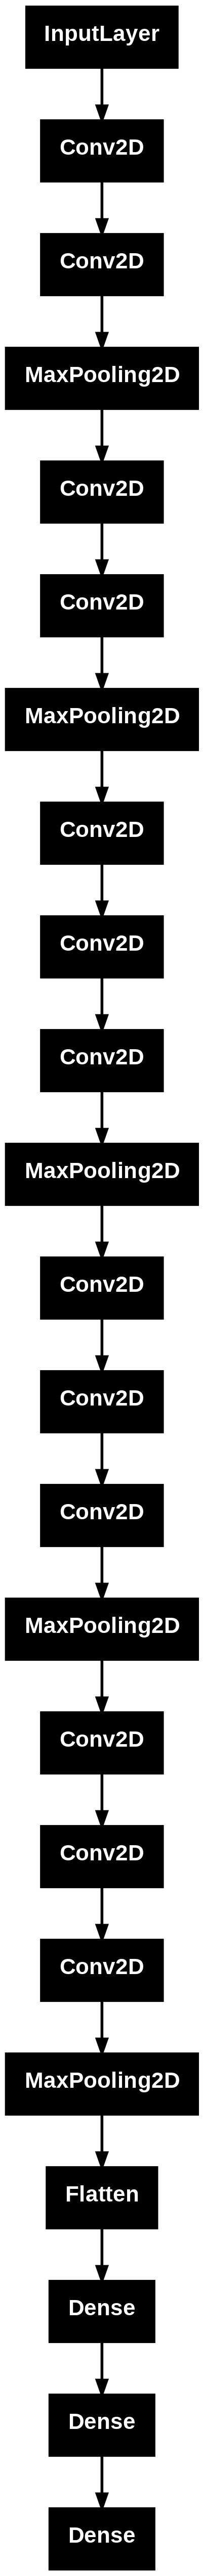

In [6]:
# plot the model diagram

from tensorflow.keras.utils import plot_model
plot_model(model, to_file='vgg.png')

In [26]:
# this code detect the convolutional layer

for i in range(len(model.layers)):  # we run a loop no of layer  in model
    # check for th convolutional layer
    if 'conv' not in model.layers[i].name: # And conv name not present in layer name  then simple skip the this loop
        continue
    # get the filter weight
    filters, biases = model.layers[i].get_weights() # ge the filter and it's bias
    print(i, model.layers[i].name)   # print model layer

1 block1_conv1
2 block1_conv2
4 block2_conv1
5 block2_conv2
7 block3_conv1
8 block3_conv2
9 block3_conv3
11 block4_conv1
12 block4_conv2
13 block4_conv3
15 block5_conv1
16 block5_conv2
17 block5_conv3


In [31]:
# print the filter of the layer 1
filters,biases = model.layers[1].get_weights()   # select weight of only layer one

f_min, f_max = filters.min(), filters.max()  # find minimum and maximum value in layer
filters = (filters - f_min) / (f_max - f_min)  # normalize the filter value
print(filters.shape)

(3, 3, 3, 64)


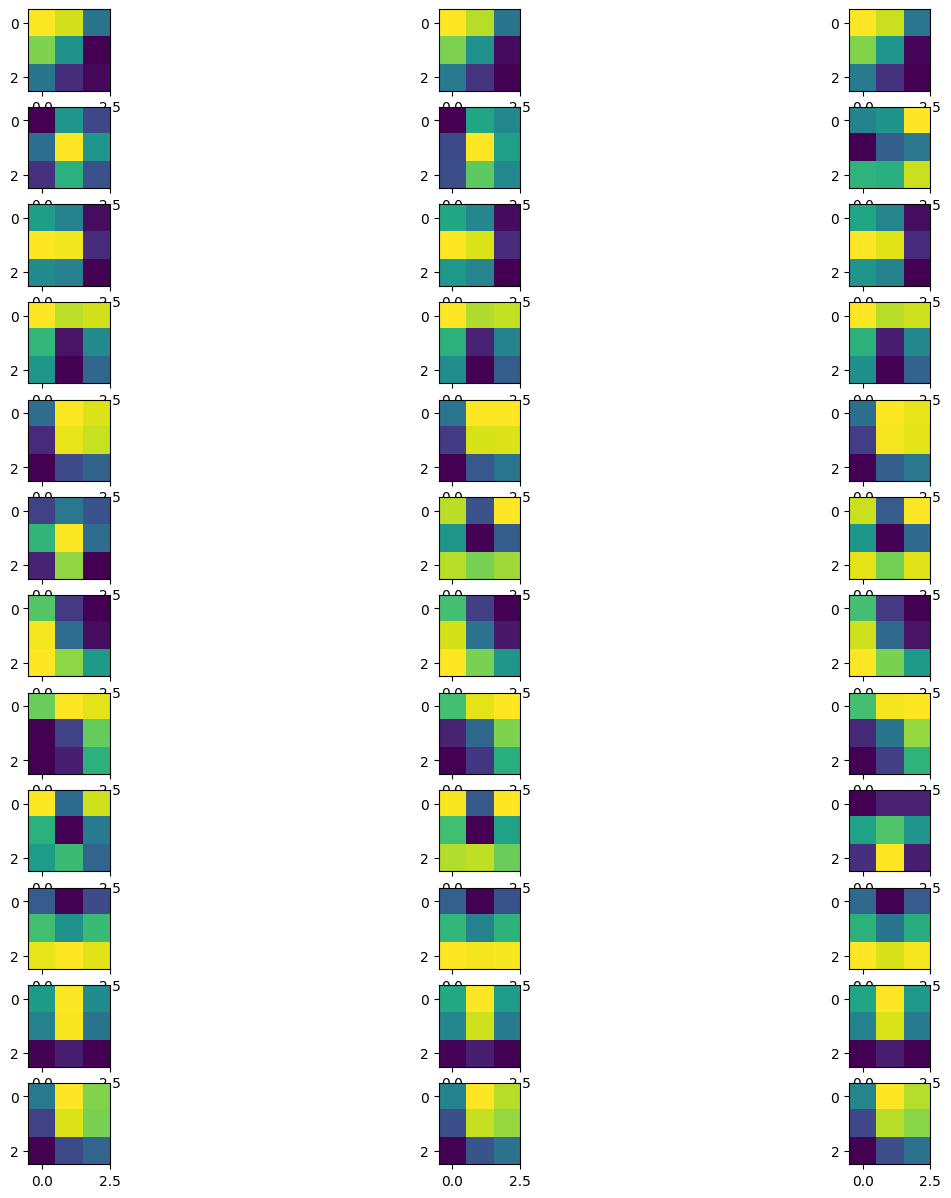

In [34]:
from matplotlib import pyplot as plt
from numpy import expand_dims
# plot first few filters
n_filter = 12 # select no of filter here we print only 12 filter out of 64
ix = 1
fig = plt.figure(figsize=(15,15))
for i in range(n_filter):
    f = filters[:, :, :, i]
    for j in range(3): # print for 3 channels of the filter
        pyplot.subplot(n_filter, 3, ix)
        pyplot.imshow(f[:, :, j])
        ix += 1
pyplot.show()

# now here we can show the filter of first layer  some filter are same and some filter are diffrent


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,792 (7.00 KB)

 Trainable params: 1,792 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

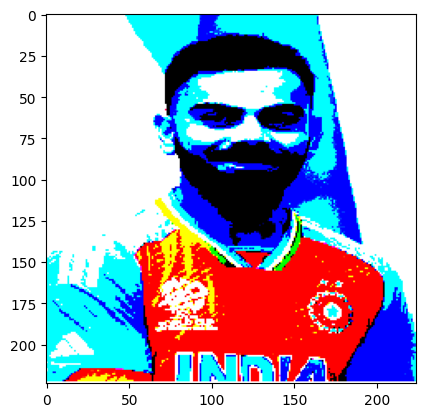

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
(1, 224, 224, 64)


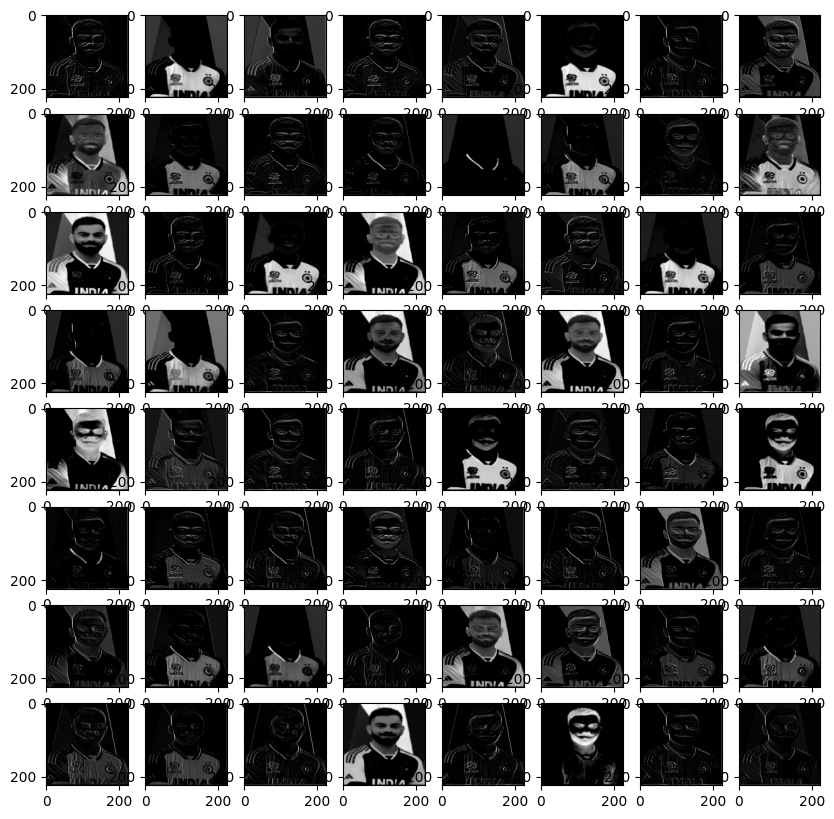

In [23]:
# Now we fit one image of the VGG16 and vislulize after apply convolutional opretion what it'find in image and how to look like
# import image library

from tensorflow.keras.models import Model
# Here in CNN we take only one convolutional layer and first convlutional layer is our output
# Changed 'input' and 'output' to 'inputs' and 'outputs' respectively for the Model definition
# Changed from model to model1 to extract features from first convolutional layer
model1 = Model(inputs=model.input, outputs=model.layers[1].output)
model1.summary()


from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
# Import expand_dims from tensorflow
from tensorflow import expand_dims
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions



# Processing of the image
image = load_img('/content/vk2.png',target_size=(224,224))

image = img_to_array(image)
image = expand_dims(image , axis=0)
image = preprocess_input(image)

# show the image
pyplot.imshow(image[0])
pyplot.show()

# Changed from model to model1 to get feature from first convolutional layer
feature = model1.predict(image)
print(feature.shape)

fig  = pyplot.figure(figsize=(10,10))
# Check if the feature shape has 4 dimensions before accessing feature.shape[3]
if len(feature.shape) == 4:
    for i in range(1,feature.shape[3]+1):
        pyplot.subplot(8,8,i)
        pyplot.imshow(feature[0,:,:,i-1],cmap='gray')
    plt.show()
else:
    print("The feature shape does not have 4 dimensions. It is:", feature.shape)

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


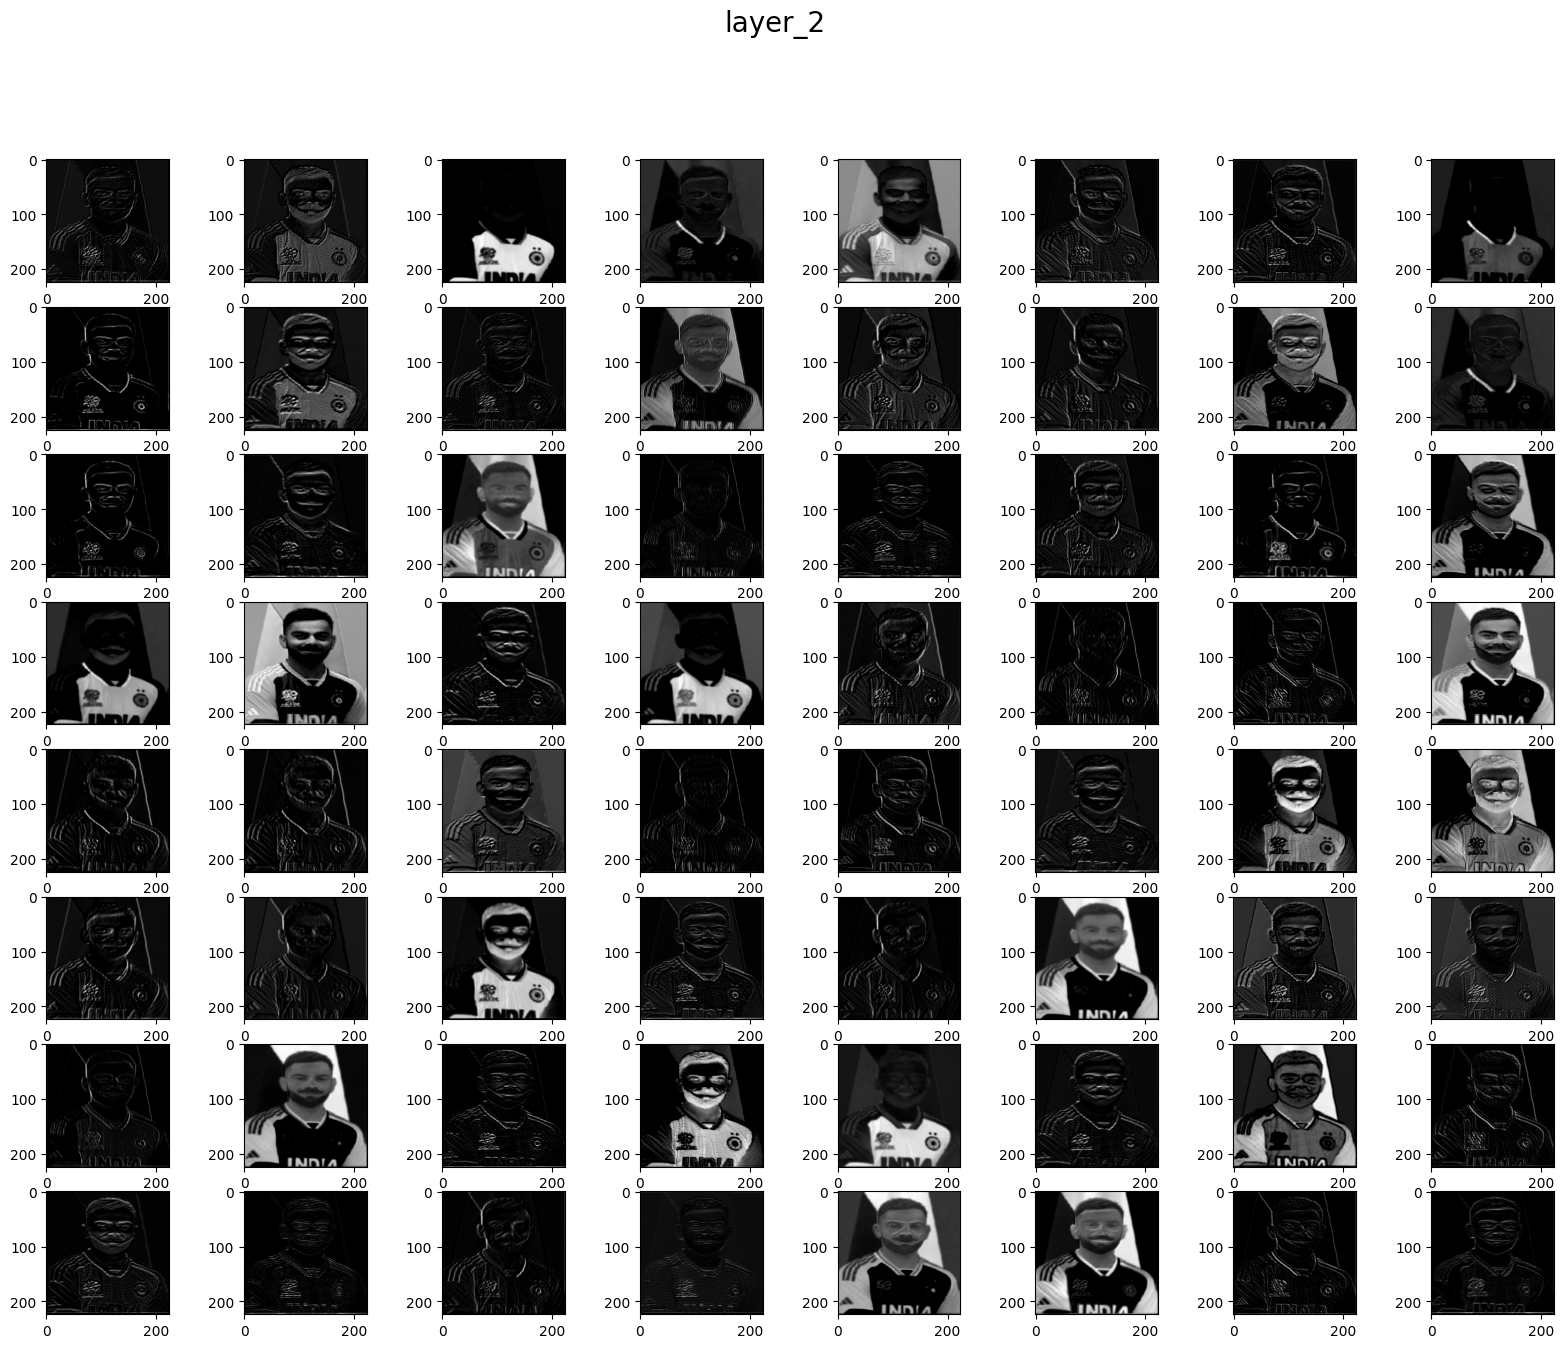

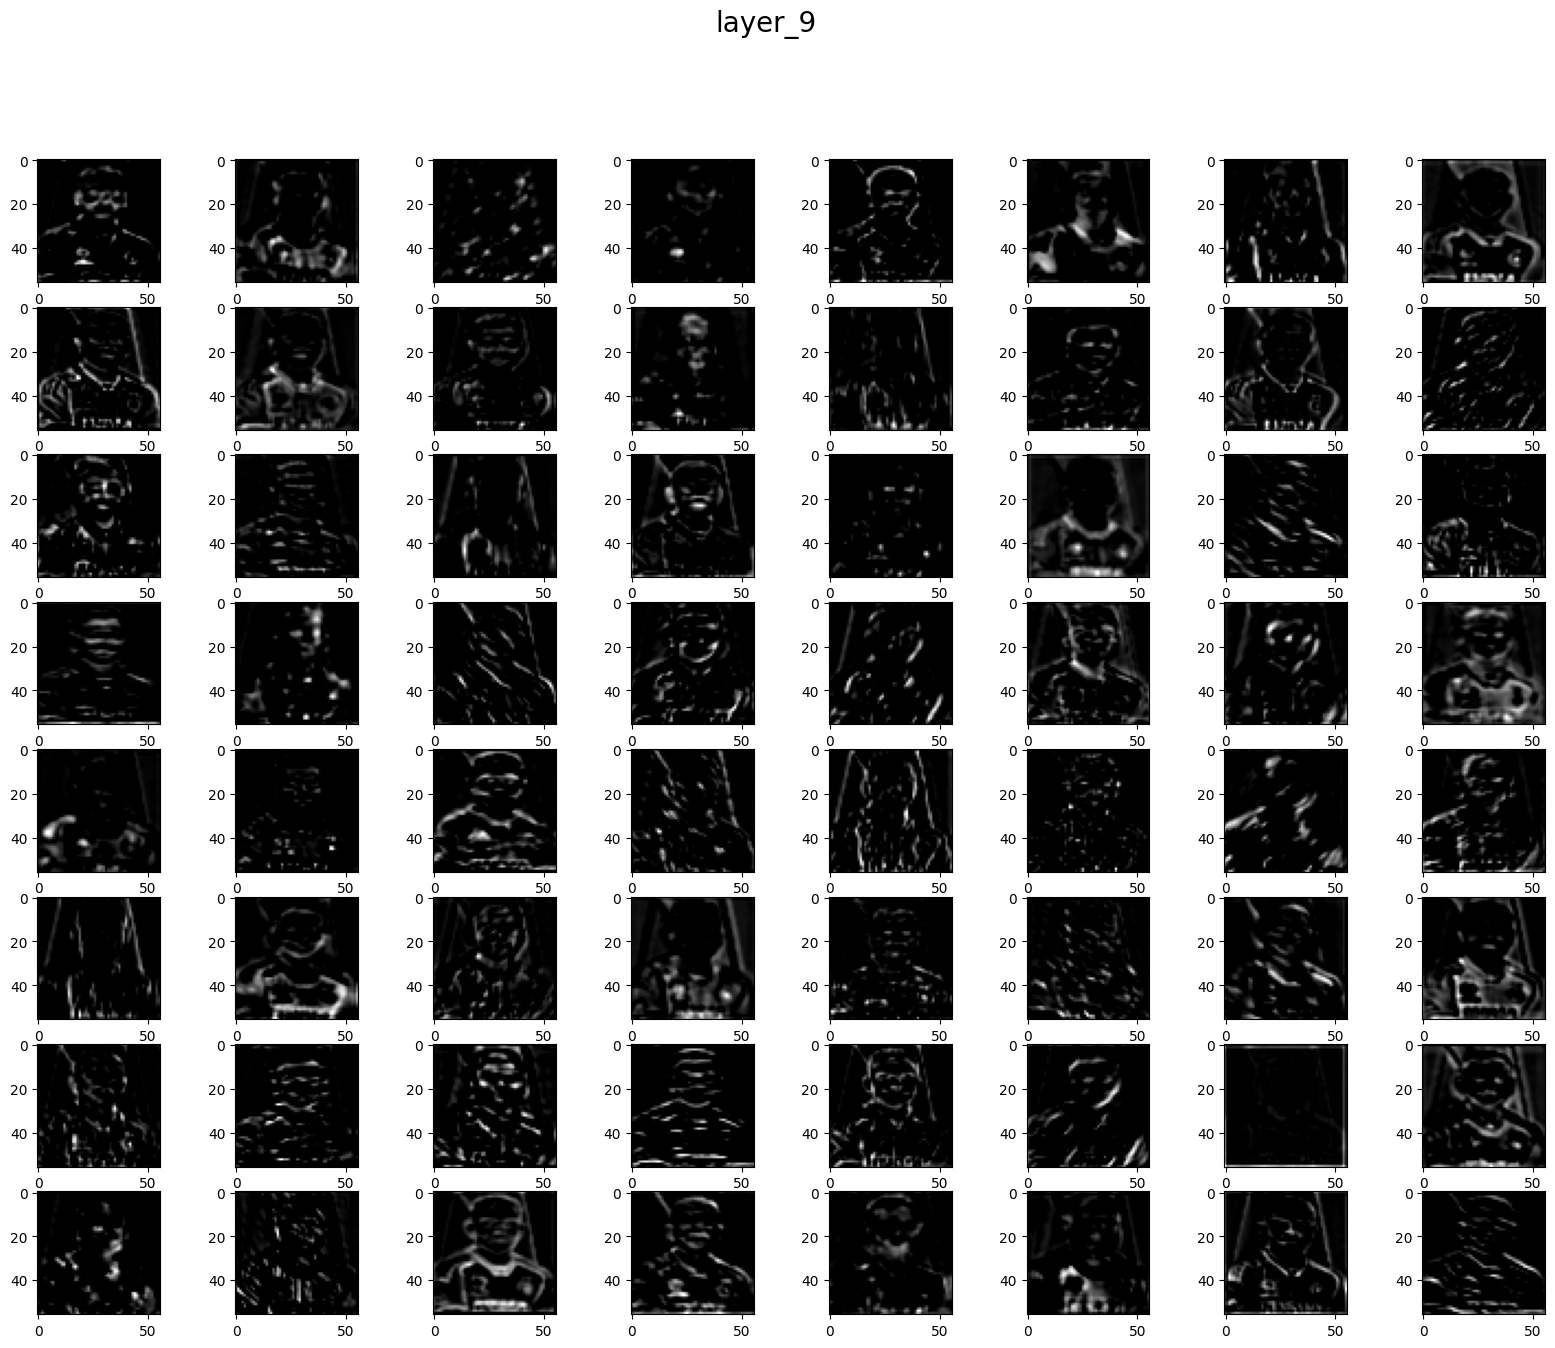

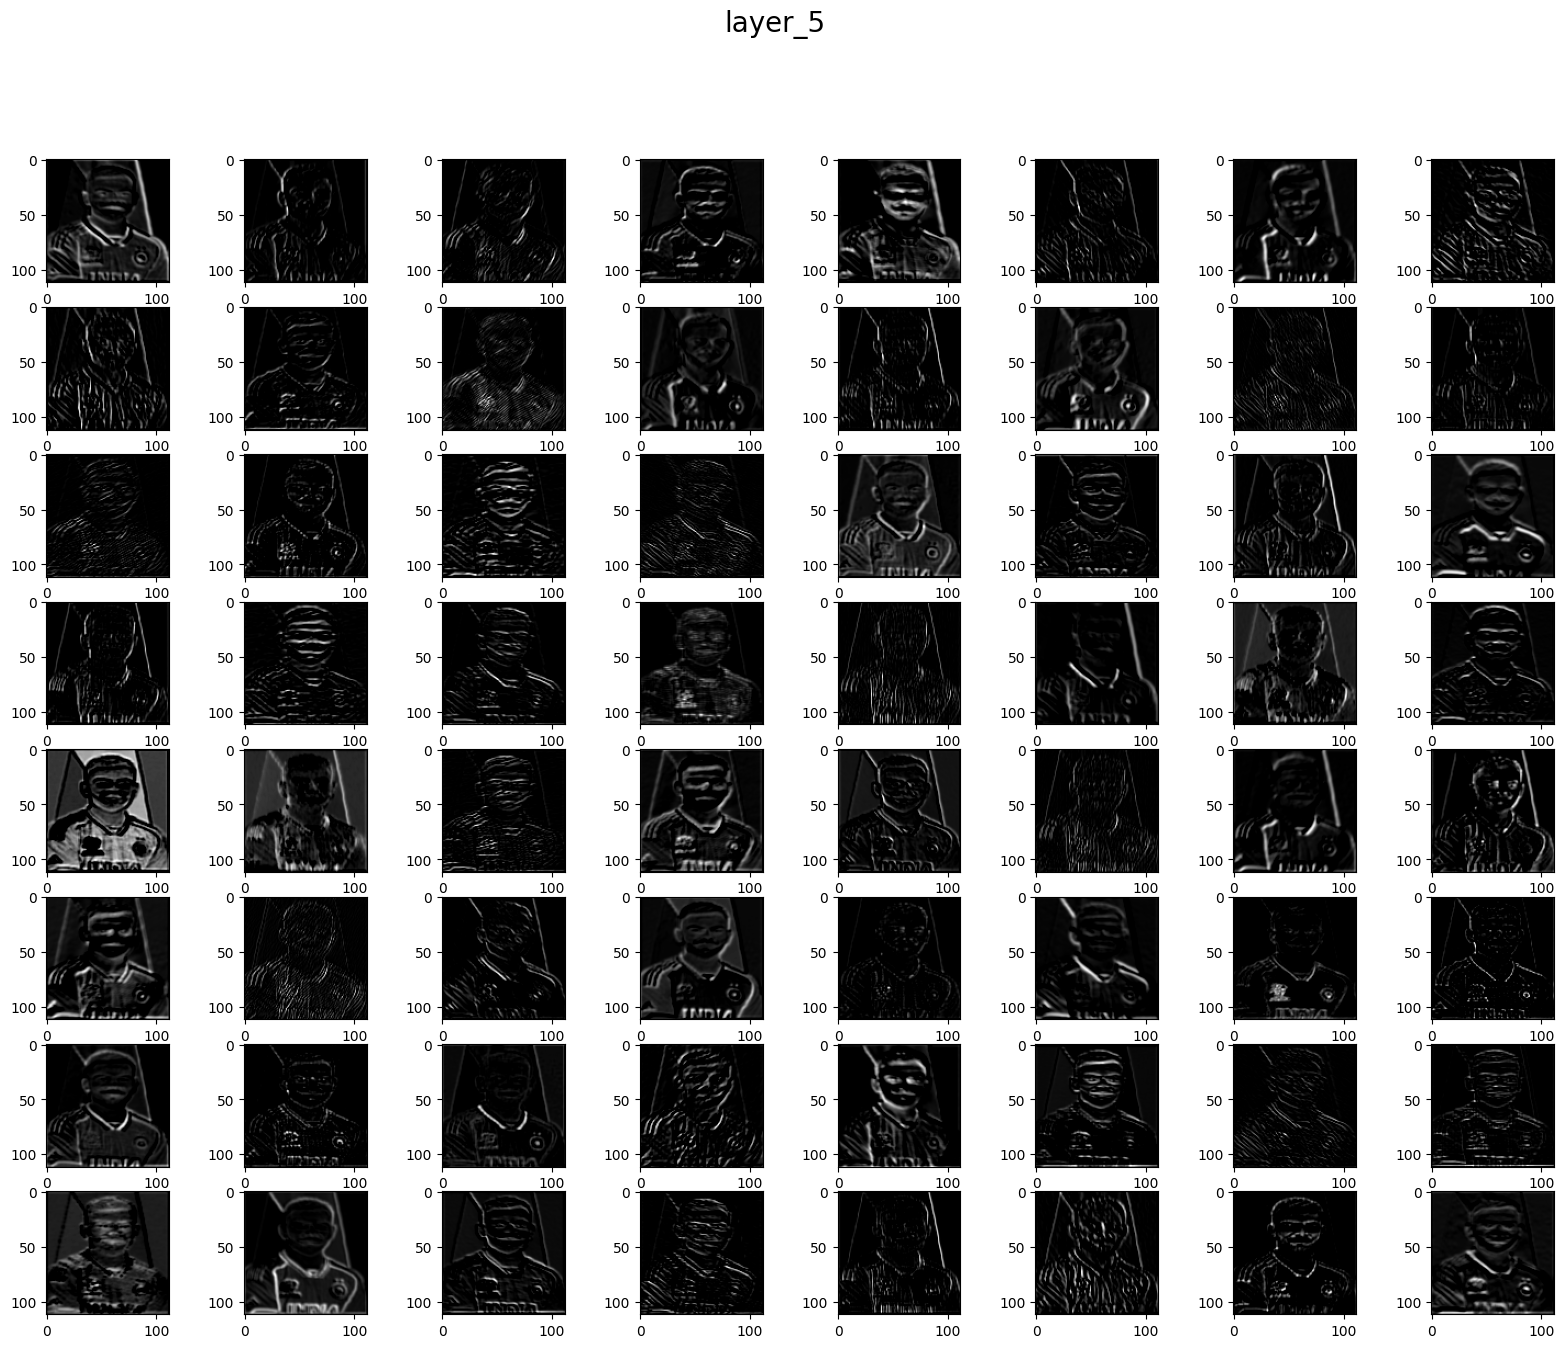

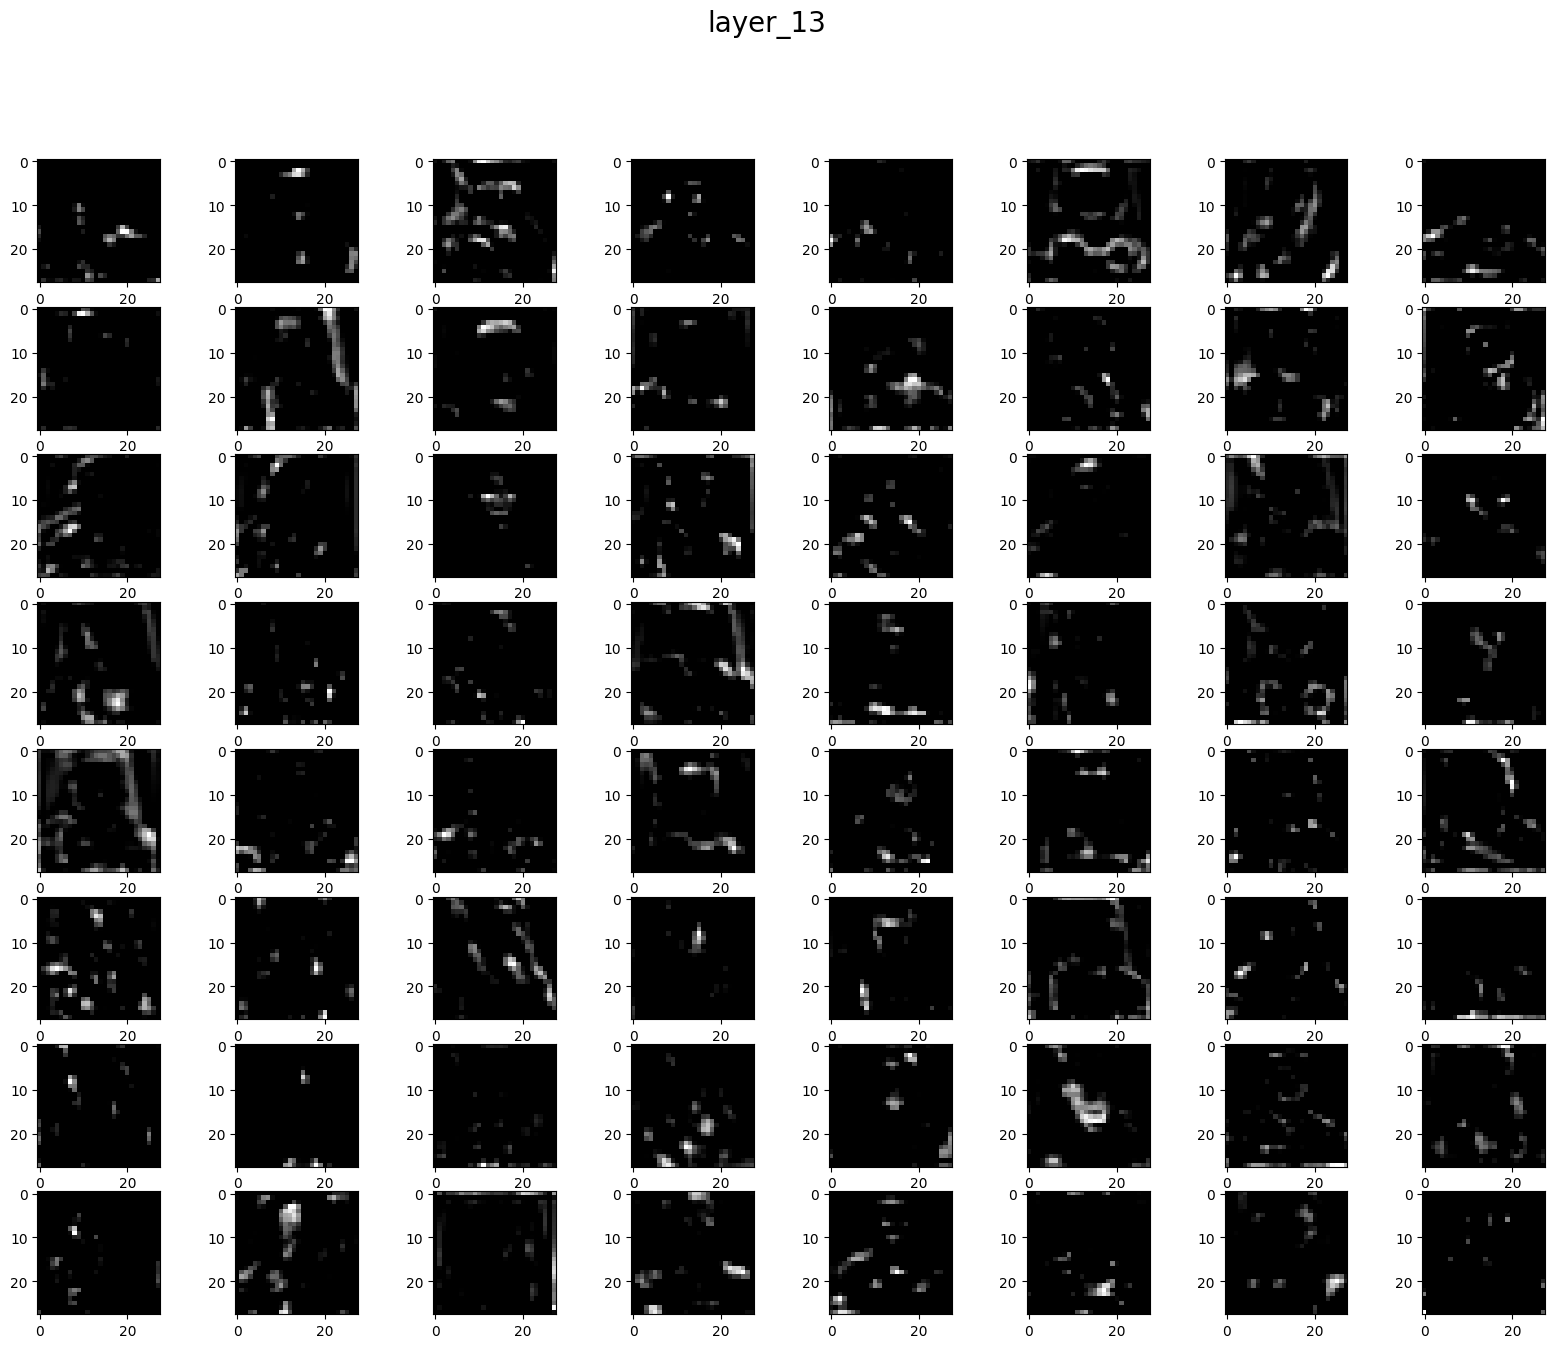

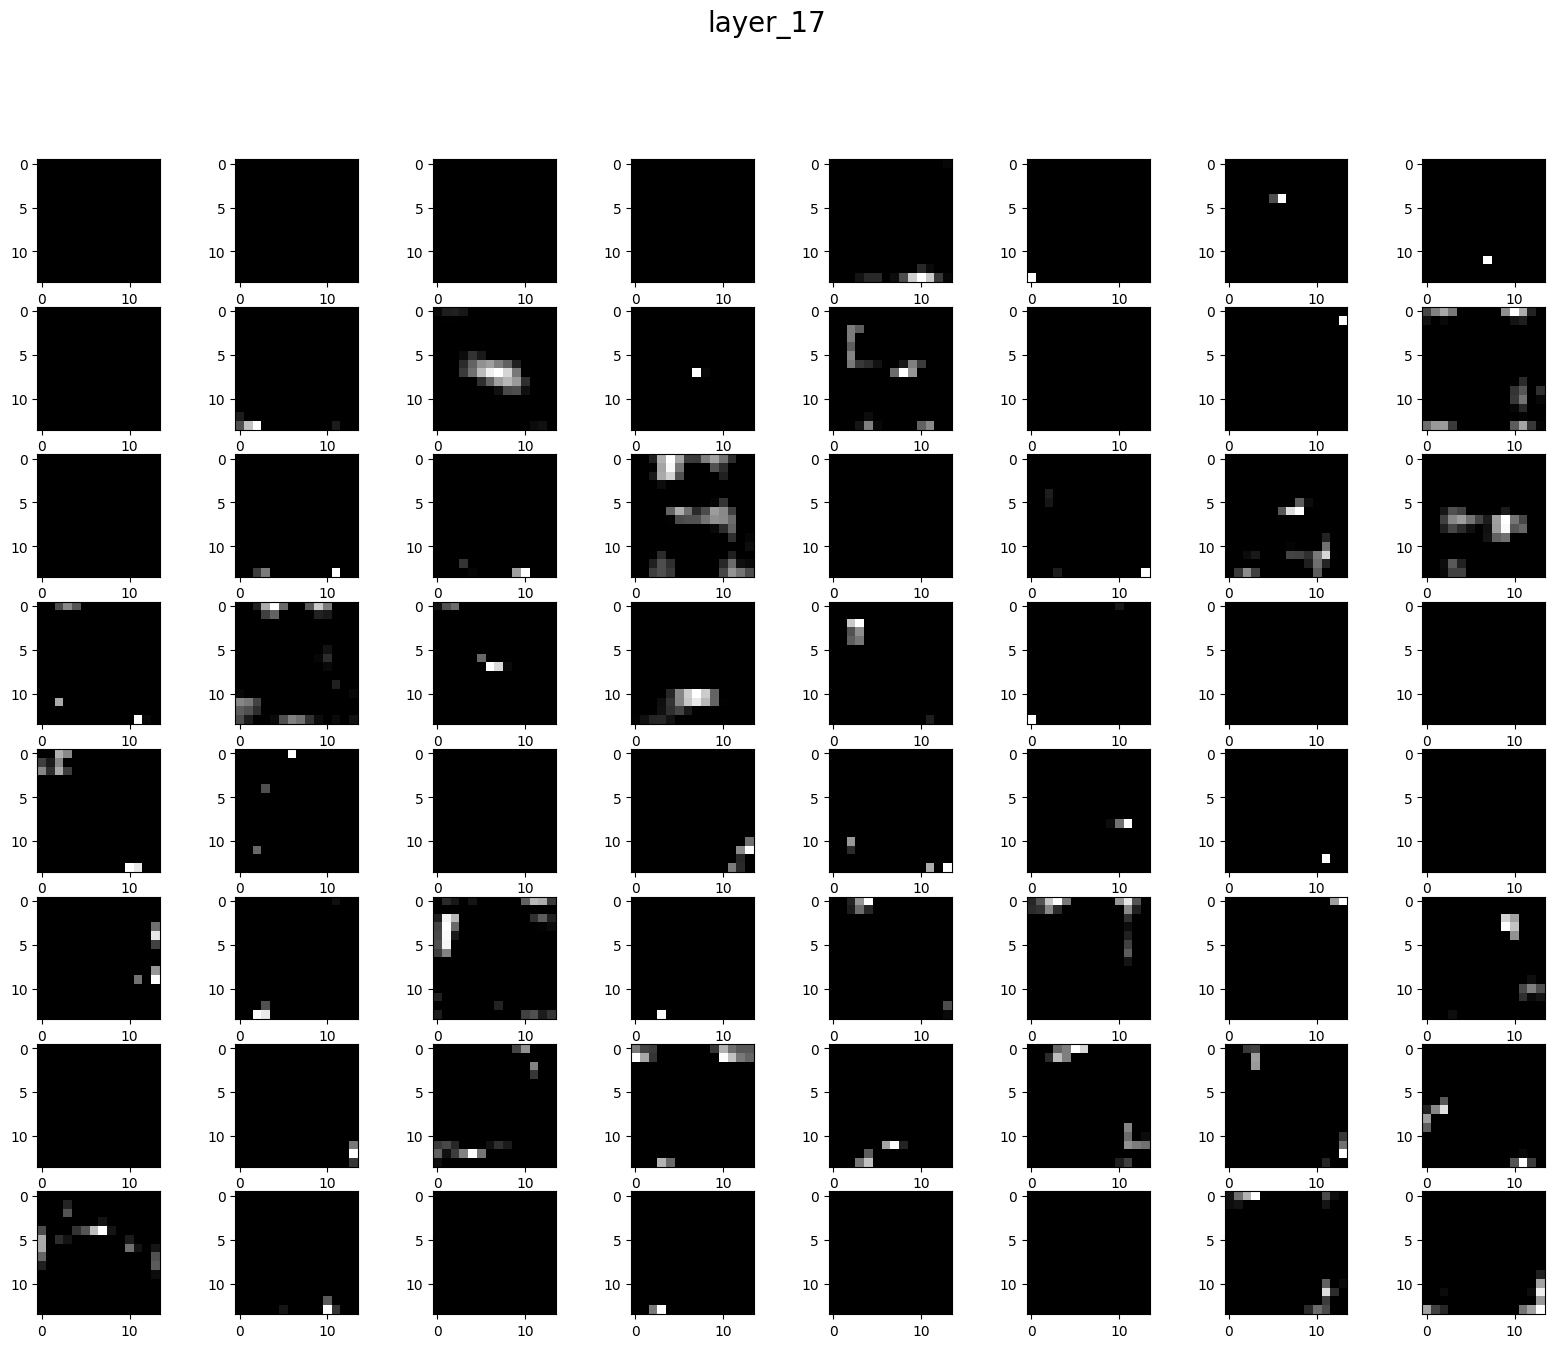

'\nConclusion  : Now we clearly see that layer 13 and 15 are find low level feture or we can sya that primitive feature like edge and layer 2,9,5 find the \n              find complex feature like shape of face ,noise and etc\n'

In [35]:
# Now we see the all the layer feature map


# create model
model2 = VGG16()

# No of layer we see the output
index = [2,9,5,13,17]

# Output of the this no of layer
outputs = [model2.layers[i].output for i in index]

# create model 3
model3 = Model(inputs=model2.inputs, outputs=outputs)

# model summary
model3.summary()

# predict the feature map of the model
feature_map = model3.predict(image)

for i,fmap in zip(index,feature_map):

    fig = pyplot.figure(figsize=(20,15)) # featurre map size
    fig.suptitle("layer_{}".format(i),fontsize = 20)

    for i in range(1,feature.shape[3]+1):
        pyplot.subplot(8,8,i)
        pyplot.imshow(fmap[0,:,:,i-1],cmap='gray')
    plt.show()

'''
Conclusion  : Now we clearly see that layer 13 and 15 are find low level feture or we can sya that primitive feature like edge and layer 2,9,5 find the
              find complex feature like shape of face ,noise and etc
'''